In [ ]:
import pandas as pd
import numpy as np

In [ ]:
coins=["BTC","ETH","BNB","SOL","ADA","XRP","LUNA1","AVAX","DOT","DOGE","SHIB","UNI1","LTC","LINK","BCH"]
shares=[51.57*100,25.79*100,5.03*100,3.10*100,2.58*100,2.33*100,1.82*100,1.57*100,1.55*100,1.33*100,1.08*100,0.63*100,0.60*100,0.54*100,0.48*100]

In [ ]:
Df=pd.DataFrame()
len(Df)

0

In [ ]:
import time
import datetime

In [ ]:
for coin in coins:
  p=int(time.mktime(datetime.datetime(2021,4,18,23,59).timetuple()))
  p2=int(time.mktime(datetime.date.today().timetuple()))
  c=coin+"-USD"
  url=f"https://query1.finance.yahoo.com/v7/finance/download/{c}?period1={p}&period2={p2}&interval=1d&events=history&includeAdjustedClose=true"
  df=pd.read_csv(url)
  df=df[['Date','Close']]
  df.rename(columns = {'Close':coin},inplace = True)
  if(len(Df)==0):
    Df=df
  else:
    Df=pd.merge(Df, df, on='Date',how="left")
Df

Date           BTC          ETH         BNB         SOL       ADA  \
0    2021-04-18  56216.183594  2237.136963  481.034241   32.302917  1.275501   
1    2021-04-19  55724.265625  2166.188721  505.092926   31.675896  1.197959   
2    2021-04-20  56473.031250  2330.210938  587.029114   31.770054  1.265934   
3    2021-04-21  53906.089844  2364.751709  546.023560   32.513042  1.206735   
4    2021-04-22  51762.273438  2403.535156  506.013000   38.879761  1.147017   
..          ...           ...          ...         ...         ...       ...   
367  2022-04-20  41374.378906  3077.745850  418.354248  105.497002  0.937341   
368  2022-04-21  40527.363281  2987.480713  405.021454  101.776138  0.910474   
369  2022-04-22  39740.320313  2964.835693  406.987518  100.612053  0.907154   
370  2022-04-23  39486.730469  2938.114014  401.652466  100.744438  0.888503   
371  2022-04-24  39712.335938  2944.038818  404.664124  101.245659  0.892464   

          XRP      LUNA1       AVAX        DOT      DOGE      SHIB       UNI1  \
0    1.405998  13.398309  29.253094  37.347431  0.320475  0.000002  31.746319   
1    1.315044  13.906250  26.283066  34.816669  0.407318  0.000004  31.446096   
2    1.383299  13.432103  27.347954  35.444435  0.319500  0.000002  31.963188   
3    1.296498  13.281159  25.903503  33.871029  0.306925  0.000001  33.603989   
4    1.159682  13.649862  24.034962  32.988476  0.260967  0.000002  34.131321   
..        ...        ...        ...        ...       ...       ...        ...   
367  0.752178  94.955681  78.274330        NaN  0.140878  0.000025   9.318609   
368  0.733178  90.799156  75.080742        NaN  0.136365  0.000024   8.860126   
369  0.719194  93.682289  74.122963        NaN  0.136395  0.000024   8.909130   
370  0.707705  89.534752  72.920013        NaN  0.134241  0.000024   8.937669   
371  0.709175  91.419968  73.342094  19.068731  0.134425  0.000024   9.029720   

            LTC       LINK         BCH  
0    273.098816  39.065910  965.682617  
1    261.919220  35.879383  894.128723  
2    260.941345  38.950634  940.986938  
3    258.805603  36.436359  913.905762  
4    253.078354  35.233406  854.077942  
..          ...        ...         ...  
367  111.979691  14.024039  330.724213  
368  106.997986  13.588746  315.880707  
369  105.600624  13.609354  320.967468  
370  105.504372  13.343726  313.447144  
371  105.453949  13.517901  313.854340  

[372 rows x 16 columns]

In [ ]:
Df.fillna(method='ffill', inplace=True)
Df.fillna(method='bfill', inplace=True)
Df['SHIB']=Df['SHIB'].replace(0,1.0e-6)

In [ ]:
Df.describe()

BTC          ETH         BNB         SOL         ADA  \
count    372.000000   372.000000  372.000000  372.000000  372.000000   
mean   45550.589298  3167.291659  440.429579  108.433201    1.546396   
std     8586.823700   715.962655   97.785779   63.833245    0.524502   
min    29807.347656  1787.510742  261.818085   23.489555    0.790125   
25%    39185.860352  2609.681762  372.107864   42.420077    1.169662   
50%    43961.396485  3113.203125  418.472458  100.630844    1.382707   
75%    50062.734375  3714.176148  507.635155  158.308414    1.985213   
max    67566.828125  4812.087402  675.684082  258.934326    2.968239   

              XRP       LUNA1        AVAX         DOT        DOGE        SHIB  \
count  372.000000  372.000000  372.000000  372.000000  372.000000  372.000000   
mean     0.927897   44.949112   59.261478   26.971682    0.229534    0.000021   
std      0.238092   31.086035   33.328325    9.444079    0.094810    0.000015   
min      0.529336    4.107670    9.650588   10.981212    0.111608    0.000001   
25%      0.754801   15.670595   23.908721   20.252199    0.153677    0.000008   
50%      0.857671   42.186159   65.721283   24.776119    0.211823    0.000022   
75%      1.090204   69.535568   84.818516   33.568437    0.269608    0.000029   
max      1.651025  116.408920  134.531036   53.881733    0.684777    0.000080   

             UNI1         LTC        LINK          BCH  
count  372.000000  372.000000  372.000000   372.000000  
mean    20.376549  165.331657   23.656724   541.415507  
std      8.211928   53.273754    7.830007   219.275122  
min      8.207583   98.869263   12.712721   274.935089  
25%     12.585528  126.487011   17.136673   376.357513  
50%     20.343328  154.221252   23.347196   524.283600  
75%     25.684223  185.542740   27.646028   629.645355  
max     43.164505  386.450775   52.198696  1542.425049

In [ ]:
for i in reversed(range(1,len(Df))):
  for coin in coins:
    Df[coin][i]=(Df[coin][i]-Df[coin][i-1])*100/Df[coin][i-1]
Df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date           BTC          ETH         BNB        SOL       ADA  \
0    2021-04-18  56216.183594  2237.136963  481.034241  32.302917  1.275501   
1    2021-04-19     -0.875047    -3.171386    5.001450  -1.941066 -6.079337   
2    2021-04-20      1.343698     7.571926   16.222003   0.297254  5.674234   
3    2021-04-21     -4.545429     1.482302   -6.985268   2.338643 -4.676310   
4    2021-04-22     -3.976947     1.640064   -7.327625  19.582046 -4.948725   
..          ...           ...          ...         ...        ...       ...   
367  2022-04-20     -0.309307    -0.849217   -0.954766  -2.841197 -1.677483   
368  2022-04-21     -2.047198    -2.932833   -3.186963  -3.526986 -2.866299   
369  2022-04-22     -1.942004    -0.757997    0.485422  -1.143770 -0.364645   
370  2022-04-23     -0.638117    -0.901287   -1.310864   0.131580 -2.055990   
371  2022-04-24      0.571345     0.201653    0.749817   0.497517  0.445806   

           XRP      LUNA1       AVAX        DOT       DOGE        SHIB  \
0     1.405998  13.398309  29.253094  37.347431   0.320475    0.000002   
1    -6.468999   3.791083 -10.152868  -6.776268  27.098214  100.000000   
2     5.190321  -3.409596   4.051613   1.803062 -21.560059  -50.000000   
3    -6.274927  -1.123756  -5.281752  -4.439078  -3.935837  -50.000000   
4   -10.552735   2.776136  -7.213468  -2.605628 -14.973691  100.000000   
..         ...        ...        ...        ...        ...         ...   
367  -2.952663  -0.690085  -2.505532   0.000000  -1.252585    0.000000   
368  -2.525998  -4.377332  -4.079994   0.000000  -3.203481   -4.000000   
369  -1.907313   3.175286  -1.275665   0.000000   0.022000    0.000000   
370  -1.597483  -4.427237  -1.622911   0.000000  -1.579237    0.000000   
371   0.207714   2.105569   0.578827  -5.843652   0.137067    0.000000   

          UNI1         LTC       LINK         BCH  
0    31.746319  273.098816  39.065910  965.682617  
1    -0.945694   -4.093608  -8.156797   -7.409670  
2     1.644376   -0.373350   8.559933    5.240656  
3     5.133408   -0.818476  -6.455030   -2.877955  
4     1.569254   -2.212954  -3.301518   -6.546388  
..         ...         ...        ...         ...  
367  -2.379959   -1.610020  -1.643270   -2.841106  
368  -4.920080   -4.448758  -3.103906   -4.488182  
369   0.553085   -1.305970   0.151655    1.610342  
370   0.320334   -0.091147  -1.951805   -2.343018  
371   1.029922   -0.047792   1.305295    0.129909  

[372 rows x 16 columns]

In [ ]:
ic15=[sum(shares)]
for i in range(1,len(Df)):
  d=((Df[coins]).iloc[[i]])
  d=d.values.tolist()[0]
  c=[]
  for i in range(len(d)):
    c.append(shares[i]+(shares[i]*d[i]/100))
  shares=c
  ic15.append(sum(c))
Df['IC15']=ic15

In [ ]:
Df.describe()

BTC          ETH         BNB         SOL         ADA  \
count    372.000000   372.000000  372.000000  372.000000  372.000000   
mean     151.098072     6.214113    1.388389    0.654721    0.070339   
std     2914.676914   116.087902   25.485528    7.390114    5.742809   
min      -13.766123   -27.200349  -33.265631  -37.208767  -26.009427   
25%       -2.127071    -2.332356   -2.335288   -3.495668   -3.287950   
50%        0.025085     0.358868    0.176866    0.141703   -0.075664   
75%        2.069611     2.904379    2.827031    3.939139    2.683068   
max    56216.183594  2237.136963  481.034241   32.302917   24.529826   

              XRP       LUNA1        AVAX         DOT        DOGE        SHIB  \
count  372.000000  372.000000  372.000000  372.000000  372.000000  372.000000   
mean     0.001229    0.932748    0.617920    0.138501    0.020840    2.410154   
std      6.016962    8.846073    7.786033    6.801384    7.106537   27.394159   
min    -32.715778  -38.589875  -36.495044  -37.933518  -36.386258  -50.000000   
25%     -2.751209   -4.024535   -3.973248   -3.089235   -3.275859   -3.846154   
50%     -0.106128    0.605328    0.596494    0.000000   -0.244105    0.000000   
75%      2.644904    5.504677    4.544980    3.049742    2.308410    2.840909   
max     32.574284   60.451911   29.253094   37.347431   27.245599  433.333333   

             UNI1         LTC        LINK         BCH          IC15  
count  372.000000  372.000000  372.000000  372.000000    372.000000  
mean    -0.043115    0.637731    0.044601    2.472963  12207.998550  
std      6.686986   15.209480    6.930741   50.440988   3234.156313  
min    -33.200449  -35.672864  -37.238777  -35.248433   6262.196484  
25%     -3.792693   -2.943102   -3.565265   -2.878080  10196.585197  
50%      0.040198    0.032769    0.327318    0.071943  12000.170233  
75%      3.575022    2.944321    3.621687    2.497932  14202.275537  
max     46.276790  273.098816   39.065910  965.682617  20171.965401

In [ ]:
Df=Df[['Date','IC15']]
Df

Date          IC15
0    2021-04-18  10000.000000
1    2021-04-19   9974.950236
2    2021-04-20  10209.187581
3    2021-04-21   9873.835111
4    2021-04-22   9727.786995
..          ...           ...
367  2022-04-20  12389.064249
368  2022-04-21  12016.253704
369  2022-04-22  11939.951874
370  2022-04-23  11811.503999
371  2022-04-24  11871.505176

[372 rows x 2 columns]

In [ ]:
for i in reversed(range(1,len(Df))):
  Df["IC15"][i]=(Df["IC15"][i]-Df["IC15"][i-1])*100/Df["IC15"][i-1]
Df["IC15"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      10000.000000
1         -0.250498
2          2.348256
3         -3.284811
4         -1.479143
           ...     
367       -0.841779
368       -3.009191
369       -0.634989
370       -1.075782
371        0.507989
Name: IC15, Length: 372, dtype: float64

In [ ]:
Df=Df[1:]
Df

Date      IC15
1    2021-04-19 -0.250498
2    2021-04-20  2.348256
3    2021-04-21 -3.284811
4    2021-04-22 -1.479143
5    2021-04-23 -1.707807
..          ...       ...
367  2022-04-20 -0.841779
368  2022-04-21 -3.009191
369  2022-04-22 -0.634989
370  2022-04-23 -1.075782
371  2022-04-24  0.507989

[371 rows x 2 columns]

In [ ]:
dates=(Df['Date'])[:-8]
data=Df["IC15"][:-8]
d=list()
c=list()
for day in dates:
  d.append(list(map(int,day.split('-'))))
for i in data:
  c.append([float(i)])

In [ ]:
from sklearn.svm import SVR
rbf_svr=SVR(C=1000.0,gamma=0.65)
rbf_svr.fit(d,c)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=0.65)

In [ ]:
dates=Df["Date"][-8:]
for day in dates:
  d.append(list(map(int,day.split('-'))))

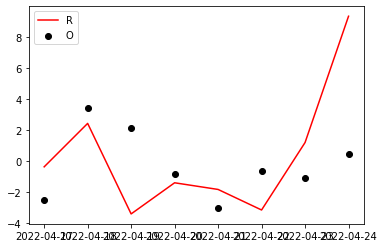

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter((Df['Date'])[-8:],Df['IC15'][-8:],color='black',label='O')
plt.plot((Df['Date'])[-8:],rbf_svr.predict(d)[:8],color='Red',label='R')
plt.legend()
plt.show()

In [ ]:
p=((datetime.datetime.now()+ datetime.timedelta(1)).strftime('%Y-%m-%d')).split('-')

In [ ]:
p

['2022', '04', '25']

In [ ]:
p=rbf_svr.predict([p])
p

array([-1.18255167])

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


# Open our new sheet and add some data.
worksheet = gc.open('output').sheet1


worksheet.update_acell("C2",round(p[0],2))
# Go to https://sheets.google.com to see your new spreadsheet.

{'spreadsheetId': '1Krw_Crb1TNwh7CVlJtEWzd5-JYrud30wmVwPePl3eg4',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!C2',
 'updatedRows': 1}

In [ ]:
s=0
for coin in coins+['HEX','WBTC','MATIC','NEAR','STETH','CRO','DAI','TRX','RUNE','SAND','THETA','FTM','CAKE']:
  s=s+1
  p=int(time.mktime(datetime.datetime(2021,4,18,23,59).timetuple()))
  p2=int(time.mktime(datetime.date.today().timetuple()))
  c=coin+"-USD"
  url=f"https://query1.finance.yahoo.com/v7/finance/download/{c}?period1={p}&period2={p2}&interval=1d&events=history&includeAdjustedClose=true"
  df=pd.read_csv(url)
  df=df[['Date','Close']]
  df.fillna(method='ffill', inplace=True)
  df.fillna(method='bfill', inplace=True)
  if coin=="SHIB":
    df['Close']=df['Close'].replace(0,1.0e-6)
  for i in reversed(range(1,len(df))):
    df["Close"][i]=(df["Close"][i]-df["Close"][i-1])*100/df["Close"][i-1]
  df=df[1:]
  d=list()
  c=list()
  for day in df['Date']:
    d.append(list(map(int,day.split('-'))))
  for i in df['Close']:
    c.append([float(i)])
  rbf_svr=SVR(C=1000.0,gamma=0.65)
  rbf_svr.fit(d,c)
  d=[]
  sdate = datetime.datetime.now()   # start date
  dates=pd.date_range(sdate,sdate+datetime.timedelta(days=365),freq='d')
  for day in dates:
    d1=str(day).split('-')
    d.append(list(map(int,str(day.strftime("%Y-%m-%d")).split('-'))))
  p=rbf_svr.predict(d)
  x=100
  for p1 in p:
    x=x*(1+(p1/100))
  x=(x-100)/100
  gc = gspread.authorize(creds)
  worksheet = gc.open('Crypto')
  worksheet.sheet1.update_acell("A"+str(s),coin)
  worksheet.sheet1.update_acell("B"+str(s),round(x,2))
  if(round(x,2)<8):
    worksheet.sheet1.update_acell("C"+str(s),"LOW")
  if(8<round(x,2)<12):
    worksheet.sheet1.update_acell("C"+str(s),"MID")
  if(12<round(x,2)):
    worksheet.sheet1.update_acell("C"+str(s),"HIGH")
  print(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.1096457948783538


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5245997517508704


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.014975762911849273


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.585463672347063


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.13444105827196837


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.025119956712951533


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8.195477213025754


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4.336981867855882


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23641864919157343


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.23372974508209013


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14.403769409321031


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.6612040285393477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.5008957355654314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.2365354297952949


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.5326298613527488


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8.931437155173182


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.11456237725552071


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.9255099212119258


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11.817709159722376


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.48439722611746105


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.9539678426967726


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.009650088619931694


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.07614042635574393


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0340650384711398


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6.6138233779986555


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.26511860063601306


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11.18051617432681


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.47043139787053667


In [ ]:
d

[[2022, 4, 24],
 [2022, 4, 25],
 [2022, 4, 26],
 [2022, 4, 27],
 [2022, 4, 28],
 [2022, 4, 29],
 [2022, 4, 30],
 [2022, 5, 1],
 [2022, 5, 2],
 [2022, 5, 3],
 [2022, 5, 4],
 [2022, 5, 5],
 [2022, 5, 6],
 [2022, 5, 7],
 [2022, 5, 8],
 [2022, 5, 9],
 [2022, 5, 10],
 [2022, 5, 11],
 [2022, 5, 12],
 [2022, 5, 13],
 [2022, 5, 14],
 [2022, 5, 15],
 [2022, 5, 16],
 [2022, 5, 17],
 [2022, 5, 18],
 [2022, 5, 19],
 [2022, 5, 20],
 [2022, 5, 21],
 [2022, 5, 22],
 [2022, 5, 23],
 [2022, 5, 24],
 [2022, 5, 25],
 [2022, 5, 26],
 [2022, 5, 27],
 [2022, 5, 28],
 [2022, 5, 29],
 [2022, 5, 30],
 [2022, 5, 31],
 [2022, 6, 1],
 [2022, 6, 2],
 [2022, 6, 3],
 [2022, 6, 4],
 [2022, 6, 5],
 [2022, 6, 6],
 [2022, 6, 7],
 [2022, 6, 8],
 [2022, 6, 9],
 [2022, 6, 10],
 [2022, 6, 11],
 [2022, 6, 12],
 [2022, 6, 13],
 [2022, 6, 14],
 [2022, 6, 15],
 [2022, 6, 16],
 [2022, 6, 17],
 [2022, 6, 18],
 [2022, 6, 19],
 [2022, 6, 20],
 [2022, 6, 21],
 [2022, 6, 22],
 [2022, 6, 23],
 [2022, 6, 24],
 [2022, 6, 25],
 [2022, 6,